In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [239]:
df = pd.read_csv('student_clustering.csv')
print("the shape of the data is", df.shape)
df.head()

the shape of the data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


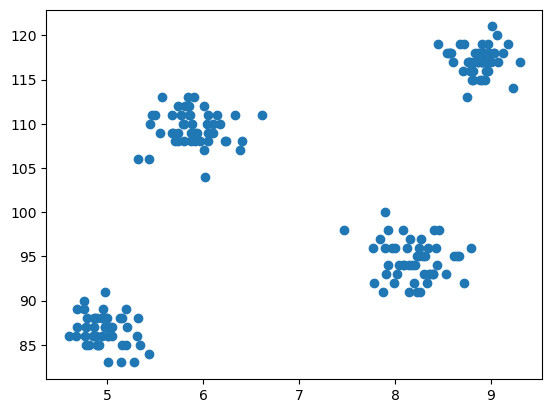

In [240]:
plt.scatter(df['cgpa'], df['iq'])

In [241]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/home/mrityunjay/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mrityunjay/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mrityunjay/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mrityunjay/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

In [242]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.7133489999997,
 681.9696599999999,
 514.1616803171114,
 388.8524026875981,
 302.5473746759042,
 234.4868734319922,
 207.09938540726347,
 171.40590752168498]

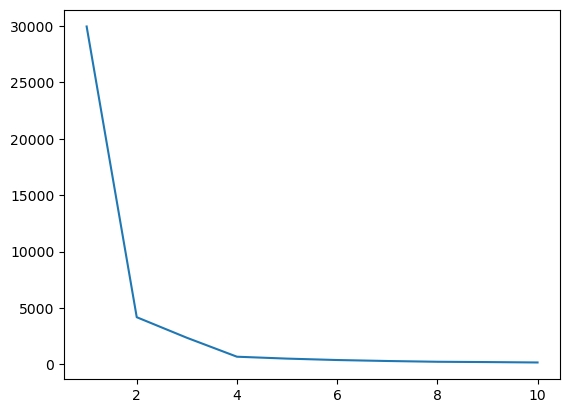

In [243]:
plt.plot(range(1,11),wcss)

In [244]:
X = df.iloc[:,:].values

In [245]:
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(X)  # train as well as cluster 

/home/mrityunjay/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


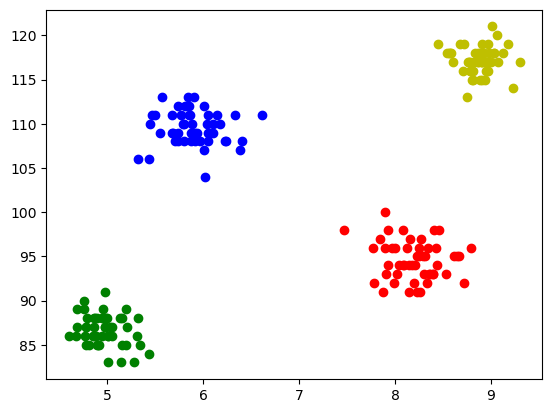

In [246]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color = 'b')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color = 'r')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color = 'y')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], color = 'g')
      

In [250]:
class KMeans1:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        
    def fit_predict(self, X):
        random_idx = random.sample(range(0, X.shape[0]), self.n_clusters) # 1. Decide #clusters
        self.centroids = X[random_idx]                                    # 2. Select random centroids
        for _ in range(self.max_iter):                                    # 3. Assign clusters
            cluster_group = self.assign_clusters(X)                       
            old_centroids = self.centroids                                # 4. Move Centroids
            self.centroids = self.move_centroids(X, cluster_group)        # Update centroids correctly
            if np.array_equal(old_centroids, self.centroids):             # 5. Finish
                break
        return cluster_group
        
    def assign_clusters(self, X):
        cluster_group = []
        for row in X:
            distances = np.sqrt(((row - self.centroids)**2).sum(axis=1)) # Efficient distance calculation
            cluster_group.append(np.argmin(distances))
        return np.array(cluster_group)
        
    def move_centroids(self, X, cluster_groups):
        new_centroids = []
        for i in range(self.n_clusters):
            points = X[cluster_groups == i]
            if len(points) > 0:
                new_centroids.append(points.mean(axis=0))
            else:  # If a cluster has no points assigned, reinitialize its centroid
                new_centroids.append(X[random.randint(0, X.shape[0]-1)])
        return np.array(new_centroids)

In [251]:
# centroids = [(-5,-5),(5,5),(-1.5, 1.5),(3.5, -3.5)]
# cluster_std = [1,1,1,1]
km1 = KMeans1(n_clusters = 4, max_iter = 100)
y_means1 = km1.fit_predict(X)

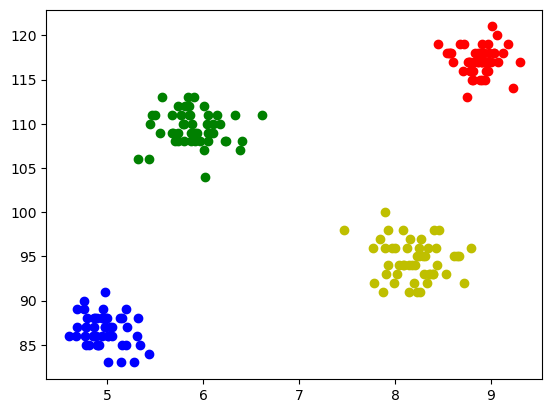

In [252]:
plt.scatter(X[y_means1 == 0,0],X[y_means1 == 0,1], color = 'b')
plt.scatter(X[y_means1 == 1,0],X[y_means1 == 1,1], color = 'r')
plt.scatter(X[y_means1 == 2,0],X[y_means1 == 2,1], color = 'y')
plt.scatter(X[y_means1 == 3,0],X[y_means1 == 3,1], color = 'g')